In [3]:
import numpy as np
import os
import pandas as pd
from collections import defaultdict
from matplotlib import rc
import matplotlib.pyplot as plt
import itertools

In [9]:
# /mnt/c/Users/Алексей/OneDrive/projects/uio/cmma/tests/experiment_8
# /mnt/seagate10/projects/cmm/experiments/1000genomes503eur9m/results/experiment_8
results_dir = "/mnt/c/Users/Алексей/OneDrive/projects/uio/cmma/tests/experiment_13"
experiments = ["height_sp", "height_ss", "ldl_sp", "ldl_ss", "scz_sp", "scz_ss"]
# ctg_intelligence_2017
# giant_height_2018_ukb
# iibdgc_cd_2017
# iibdgc_ibd_2017
# lipids_ldl_2013
# lipids_tg_2013
# pgc_bip_2016
# pgc_scz_2014_eur
# ssgac_ea_2018_no23andme
# diagram_t2d_2018_adjbmi
# pgc_adhd_2017_eur
# ssgac_risk_2019
# giant_bmi_2015_eur
# giant_height_2014
experiment = "experiment_13"
trait = "4_free_par"

npz_file_prefixes = [
    f"optimize.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.giant_height_2018_ukb.{experiment}.same_p.npz",
    f"optimize.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.giant_height_2018_ukb.{experiment}.same_sigma.npz",
    f"optimize.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.lipids_ldl_2013.{experiment}.same_p.npz",
    f"optimize.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.lipids_ldl_2013.{experiment}.same_sigma.npz",
    f"optimize.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.pgc_scz_2014_eur.{experiment}.same_p.npz",
    f"optimize.1000genomes503eur9m.annot.utr5utr3exon_other.sumstats.pgc_scz_2014_eur.{experiment}.same_sigma.npz"
    ]
n_runs = 1
total_het = [2331175.1779560475, 31160.435318053205]
save = True

In [10]:
par2take = ["success", "fun", "nit", "nfev", "p_opt", "sb2_opt", "s02_opt"]
res_dict = defaultdict(list)
for ei, e in enumerate(experiments):
    npz_file_prefix = npz_file_prefixes[ei]
    for i in range(1, n_runs+1):
#         fname = os.path.join(results_dir, npz_file_prefix + f".{i}" + ".npz")
        fname = os.path.join(results_dir, npz_file_prefix)
        if not os.path.isfile(fname): continue
        res_dict["experiment"].append(e)
        res = np.load(fname)
        n_cat = len(res["p_opt"])
        res_dict["run"].append(i)
        for par_name in par2take:
            if par_name == "p_opt" or par_name == "sb2_opt":
                key_prefix = "pi" if par_name == "p_opt" else "sigma"
                for i in range(n_cat):
                    key = f"{key_prefix}_{i}"
                    par_val = res.get(par_name).item(i)
                    res_dict[key].append(par_val)
            else:
                key = par_name
                par_val = res.get(par_name).item(0)
                res_dict[key].append(par_val)
        # add heritability
        for i in range(n_cat):
            res_dict[f"h2_{i}"].append(total_het[i]*res_dict[f"pi_{i}"][-1]*res_dict[f"sigma_{i}"][-1])
        res_dict["h2"].append(sum([res_dict[f"h2_{i}"][-1] for i in range(n_cat)]))
df = pd.DataFrame(res_dict)

In [11]:
df.sort_values("fun", inplace=True)
if save:
    df.to_csv(f"{experiment}.{trait}.parameters.csv")
df

,experiment,run,success,fun,nit,nfev,pi_0,pi_1,sigma_0,sigma_1,s02_opt,h2_0,h2_1,h2
3,ldl_ss,1,True,1.450341,456,885,0.000015,0.003350,0.000777,0.000777,0.983439,0.026978,0.081160,0.108138
2,ldl_sp,1,True,1.451036,224,462,0.000474,0.000474,0.000063,0.004959,0.928969,0.070080,0.073302,0.143382
5,scz_ss,1,True,1.630324,173,363,0.002069,0.028025,0.000063,0.000063,1.188533,0.305601,0.055343,0.360944
4,scz_sp,1,True,1.630493,149,314,0.003204,0.003204,0.000044,0.000405,1.184690,0.325194,0.040472,0.365665
1,height_ss,1,True,2.276195,155,317,0.000625,0.034576,0.000206,0.000206,2.381837,0.300246,0.222056,0.522302
0,height_sp,1,True,2.285228,186,378,0.001182,0.001182,0.000148,0.002755,2.284170,0.408451,0.101435,0.509886


In [41]:
OUT_FILE = f"{experiment}.{trait}.parameters.png"
N_COLORS = 5
N_MARKERS = 3
FIG_TITLE = trait.replace("_", " ").upper()
ANNOT_CATEGORIES = ["OTHER", "GENES"]
AXIS_TITLES = ["pi (polygenicity)", "sigmaB^2 (effect size)", "sigma0^2", "h2 (heritability)", "cost func"]
COLS2PLOT = ["pi_0","pi_1","sigma_0","sigma_1","s02_opt","h2_0","h2_1","h2","fun"]
AXIS_GROUPS = [2,2,1,3,1]

T10_COLORS = [f"C{i}" for i in range(10)][:N_COLORS]
#             orange, sky_blue, bluish_green, yellow, reddish_purple, vermillion, blue, black
CB_COLORS = ["#e69f00","#56b4e9","#009e73","#f0e442","#cc79a7","#d55e00","#0072b2","#000000"]

COLORS = CB_COLORS

MARKERS = ["o", "s", "d", "X", "^", "*"][:N_MARKERS]
assert (len(AXIS_GROUPS) == 5) and (sum(AXIS_GROUPS) == len(COLS2PLOT))

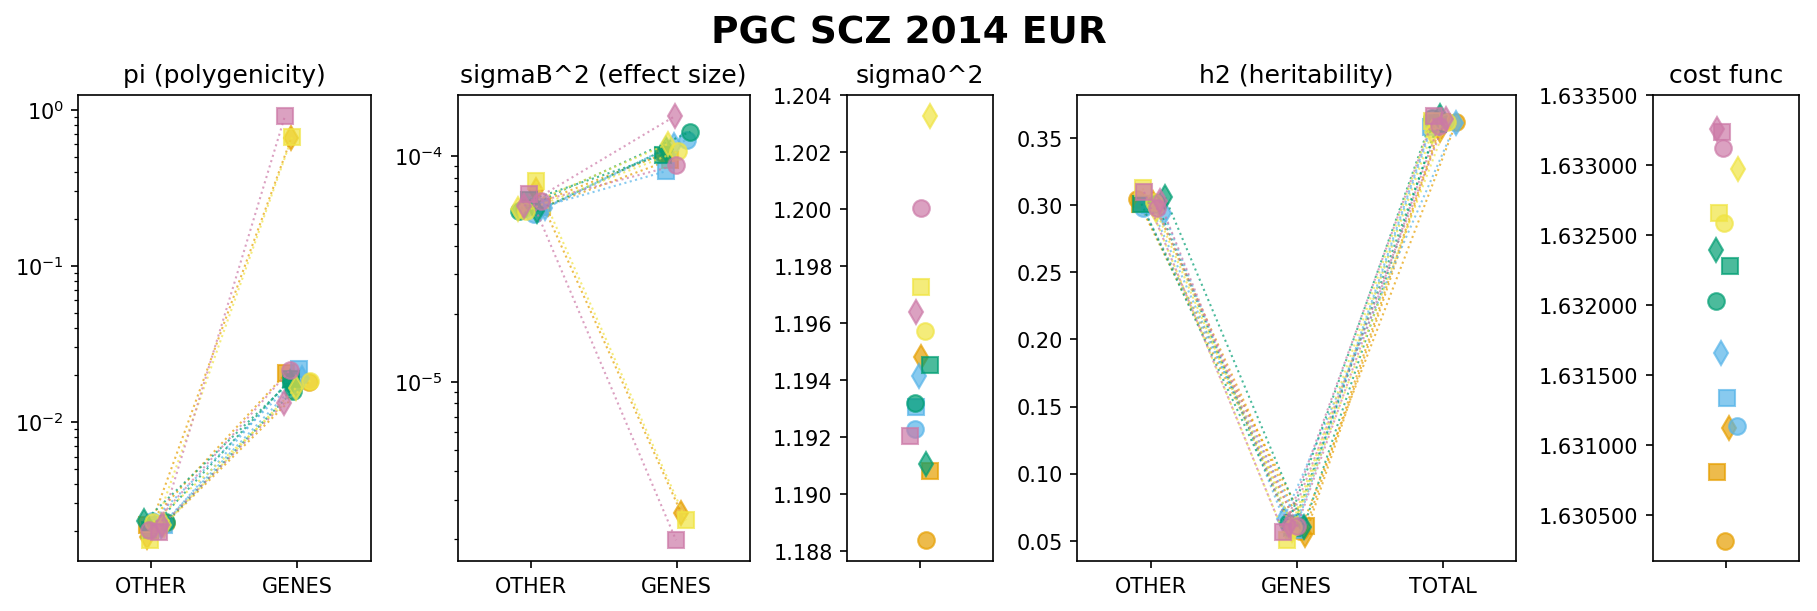

In [42]:
df.sort_values("fun", inplace=True)
color_marker = tuple(itertools.product(COLORS, MARKERS))
y_spread = 0.2
fig, axs = plt.subplots(nrows=1, ncols=len(AXIS_GROUPS), figsize=(12,4), constrained_layout=True,
                        gridspec_kw={'width_ratios':AXIS_GROUPS}, dpi=150)
for row_i, row in enumerate(df.itertuples()):
    row_dict = row._asdict()
    data = [row_dict[col] for col in COLS2PLOT]
    ax_i = 0
    y_i = 0
    for i in AXIS_GROUPS:
        ax = axs[ax_i]
        y = []
        for j in range(i):
            y.append(data[y_i])
            y_i += 1
#         x = range(len(y))
        x = np.arange(len(y)) + y_spread*(0.5-np.random.rand(len(y)))
        ax.plot(x,y,color=color_marker[row_i][0],marker=color_marker[row_i][1],ls=":",lw=1,alpha=0.7,ms=8)
        ax.set_title(AXIS_TITLES[ax_i])
        ax_i += 1
# process pi and sigma2 axis
for ax in axs[:2]:
    ax.set_yscale('log')
    x_ticks = range(len(ANNOT_CATEGORIES))
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(ANNOT_CATEGORIES)
    ax.set_xlim((-0.5,1.5))
# process sigma0^2 and cost_func axis
for ax in (axs[2], axs[-1]):
    ax.set_xticks([0])
    ax.set_xticklabels("")
    ax.set_xlim((-3*y_spread,3*y_spread))
# process sigma0^2 axis
y_ticks = axs[-1].get_yticks()
y_tick_labels = [f"{ytl:.6f}" for ytl in y_ticks]
axs[-1].set_yticks(y_ticks[1:])
axs[-1].set_yticklabels(y_tick_labels[1:])
# process h2 axis
# axs[-2].set_yscale('log')
x_ticks = range(len(ANNOT_CATEGORIES) + 1)
axs[-2].set_xticks(x_ticks)
axs[-2].set_xticklabels(ANNOT_CATEGORIES + ["TOTAL"])
axs[-2].set_xlim((-0.5,2.5))

_ = fig.suptitle(FIG_TITLE, fontsize=18, weight='bold')
if save:
    plt.savefig(OUT_FILE)

In [70]:
table_df = pd.DataFrame(index=["GENES", "OTHER", "GENES/OTHER"], columns=["pi (polygenicity)", "sigmaB^2 (effect size)", "h2 (heritability)"])
df.sort_values("fun", inplace=True)
table_df.loc["GENES",:] = df.loc[df.index[0],["pi_1", "sigma_1", "h2_1"]].values
table_df.loc["OTHER",:] = df.loc[df.index[0],["pi_0", "sigma_0", "h2_0"]].values
table_df.loc["GENES/OTHER",:] = table_df.loc["GENES",:].values/table_df.loc["OTHER",:].values

In [10]:
OUT_FILE = f"experiment_8.{trait}.pi_sigma2_h2.csv"
if save:
    table_df.to_csv(OUT_FILE)
table_df

,pi (polygenicity),sigmaB^2 (effect size),h2 (heritability)
GENES,0.0165451,5.66779e-05,0.0292205
OTHER,0.000930913,4.86407e-05,0.105556
GENES/OTHER,17.773,1.16524,0.276824


In [25]:
table_df

,pi (polygenicity),sigmaB^2 (effect size),h2 (heritability)
GENES,0.767228,1.37638e-16,3.29052e-12
OTHER,0.00232888,7.12646e-06,0.0386897
GENES/OTHER,329.441,1.93136e-11,8.5049e-11


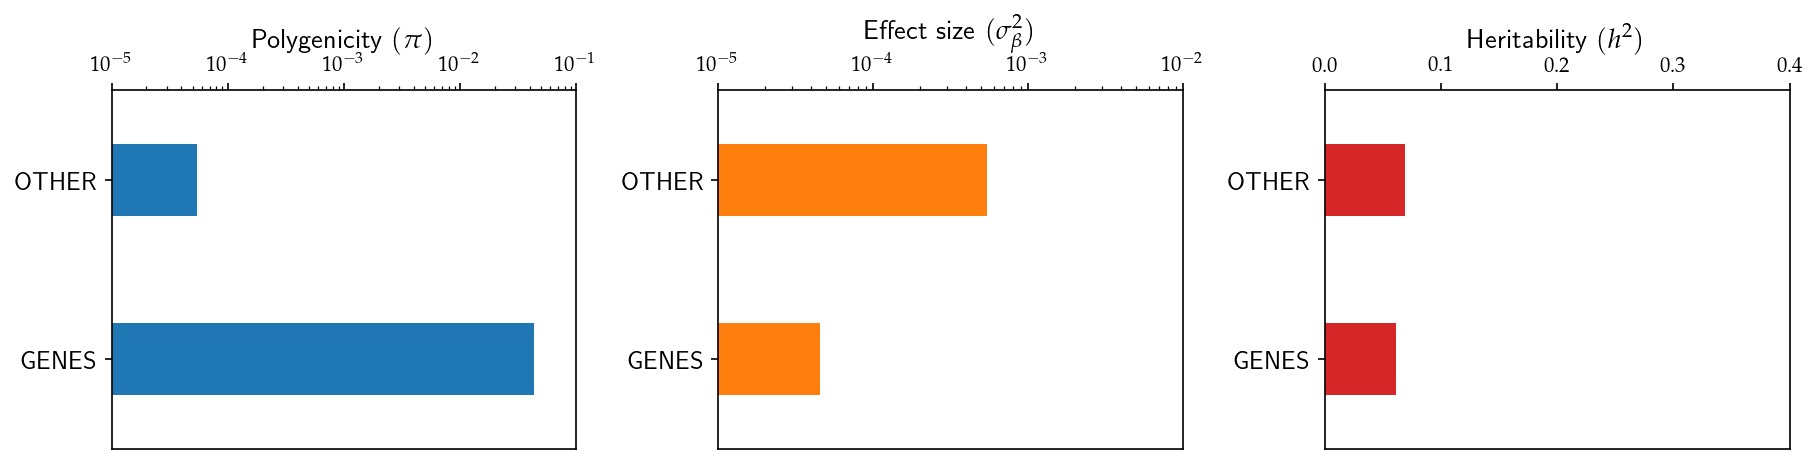

In [89]:
# presentation
rc('text', usetex=True)
# rc('font',**{'family':'sans-serif','sans-serif':['Mono']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})


df.sort_values("fun", inplace=True)
best_run_ind = df.index[0]
OUT_FILE = f"experiment_8.{trait}.pi_sigma_h2.png"
FIG_TITLE = trait.replace("_", " ").upper()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,3), constrained_layout=True, dpi=150)
# axs[0] - pi; axs[1] - sigma2; axs[2] - h2

# process axs[0] - pi
y_pos = [0, 1]
y_labels = ["GENES", "OTHER"]
axs[0].barh(y_pos, df.loc[best_run_ind, ["pi_1", "pi_0"]], 0.4, align='center', color="C0")
axs[0].invert_yaxis()  # labels read top-to-bottom

axs[0].set_yticks(y_pos)
axs[0].set_yticklabels(y_labels, fontsize=12)
axs[0].set_ylim([-0.5, 1.5])

axs[0].set_xlabel(r'Polygenicity $\displaystyle(\pi)$', fontsize=13)
axs[0].xaxis.set_label_position('top') 
axs[0].xaxis.tick_top()
axs[0].set_xscale('log')
axs[0].set_xlim([1.E-5, 1.E-1])


# process axs[1] - sigma
y_pos = [0, 1]
y_labels = ["GENES", "OTHER"]
axs[1].barh(y_pos, df.loc[best_run_ind, ["sigma_1", "sigma_0"]], 0.4, align='center', color="C1")
axs[1].invert_yaxis()  # labels read top-to-bottom

axs[1].set_yticks(y_pos)
axs[1].set_yticklabels(y_labels, fontsize=12)
axs[1].set_ylim([-0.5, 1.5])

axs[1].set_xlabel(r'Effect size $\displaystyle(\sigma^2_{\beta})$', fontsize=13)
axs[1].xaxis.set_label_position('top') 
axs[1].xaxis.tick_top()
axs[1].set_xscale('log')
axs[1].set_xlim([1.E-5, 1.E-2])


# process axs[2] - h2
y_pos = [0, 1]
y_labels = ["GENES", "OTHER"]
axs[2].barh(y_pos, df.loc[best_run_ind, ["h2_1", "h2_0"]], 0.4, align='center', color="C3")
axs[2].invert_yaxis()  # labels read top-to-bottom

axs[2].set_yticks(y_pos)
axs[2].set_yticklabels(y_labels, fontsize=12)
axs[2].set_ylim([-0.5, 1.5])

axs[2].set_xlabel(r'Heritability $\displaystyle(h^2)$', fontsize=13)
axs[2].xaxis.set_label_position('top') 
axs[2].xaxis.tick_top()
axs[2].set_xlim([0, 0.4])

# _ = fig.suptitle(FIG_TITLE, fontsize=18, weight='bold')

if save:
    plt.savefig(OUT_FILE)